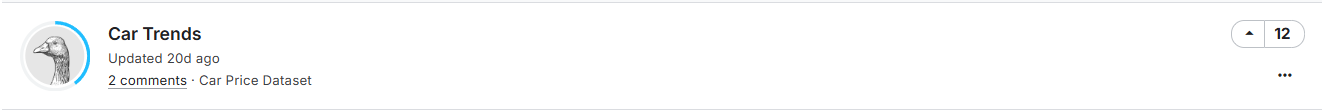

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv("../car_price_dataset.csv")
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10000.0,2011.54370,6.897699,2000.0,2006.00,2012.0,2017.0,2023.0
Engine_Size,10000.0,3.00056,1.149324,1.0,2.00,3.0,4.0,5.0
Mileage,10000.0,149239.11180,86322.348957,25.0,74649.25,149587.0,223577.5,299947.0
Doors,10000.0,3.49710,1.110097,2.0,3.00,3.0,4.0,5.0
Owner_Count,10000.0,2.99110,1.422682,1.0,2.00,3.0,4.0,5.0
Price,10000.0,8852.96440,3112.596810,2000.0,6646.00,8858.5,11086.5,18301.0


In [5]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

In [8]:
data_corr=df.select_dtypes(include=["float","int"]).corr()
data_corr

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,0.663036
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,0.357403
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,-0.551227
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,0.000511
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,0.002656
Price,0.663036,0.357403,-0.551227,0.000511,0.002656,1.000000


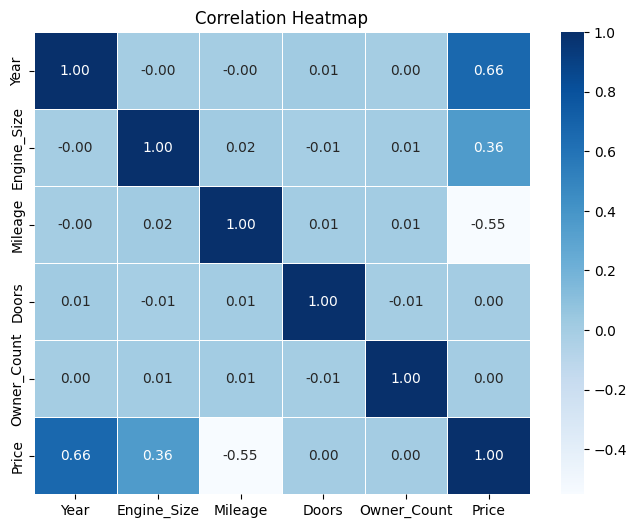

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df.Brand.value_counts()

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

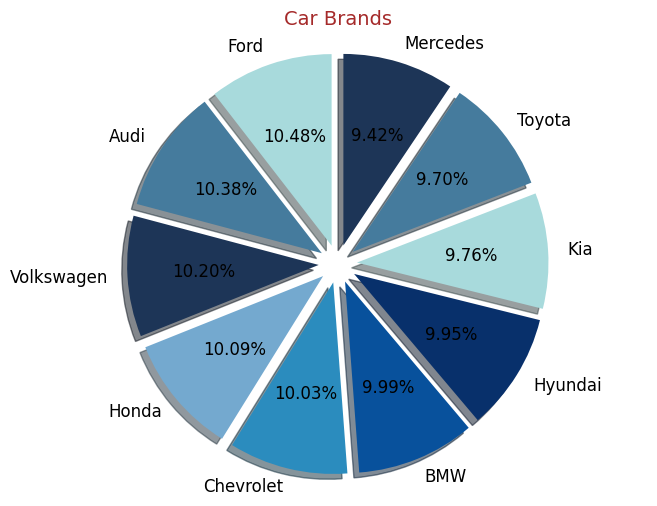

In [11]:
new_list =df.Brand.value_counts()
labels = df.Brand.value_counts().index
colors = ["#a8dadc", "#457b9d", "#1d3557", "#74a9cf", "#2b8cbe", "#08519c", "#08306b"]
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(new_list, labels=labels, autopct='%1.2f%%', startangle=90,
       explode=[0.1] * len(labels), shadow = 0.1, textprops={'fontsize': 12},colors=colors)


ax.set_title('Car Brands', fontsize=14,color="brown")
ax.axis('equal')

plt.show()

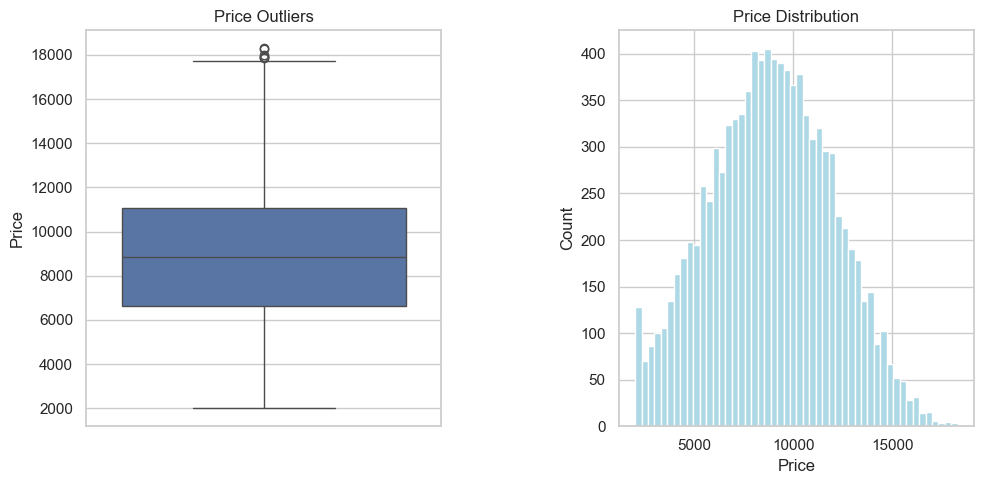

In [12]:
sns.set_theme(style="whitegrid")
fig,axes=plt.subplots(1,2,figsize=(10,5))

sns.boxplot(y=df["Price"],ax=axes[0])
axes[0].set_title("Price Outliers")

df["Price"].hist(bins=50, color="lightblue",ax=axes[1])
axes[1].set_xlabel("Price")
axes[1].set_ylabel("Count")
axes[1].set_title("Price Distribution")

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [13]:
new_pivot = df.pivot_table(
    index="Brand",              
    values="Price",     
    aggfunc="mean"                    
)
new_pivot

,Price
Brand,
Audi,8929.373796
BMW,8704.068068
Chevrolet,9015.683948
Ford,8852.570611
Honda,8665.596630
Hyundai,8778.279397
Kia,8880.086066
Mercedes,8980.087049
Toyota,8798.184536


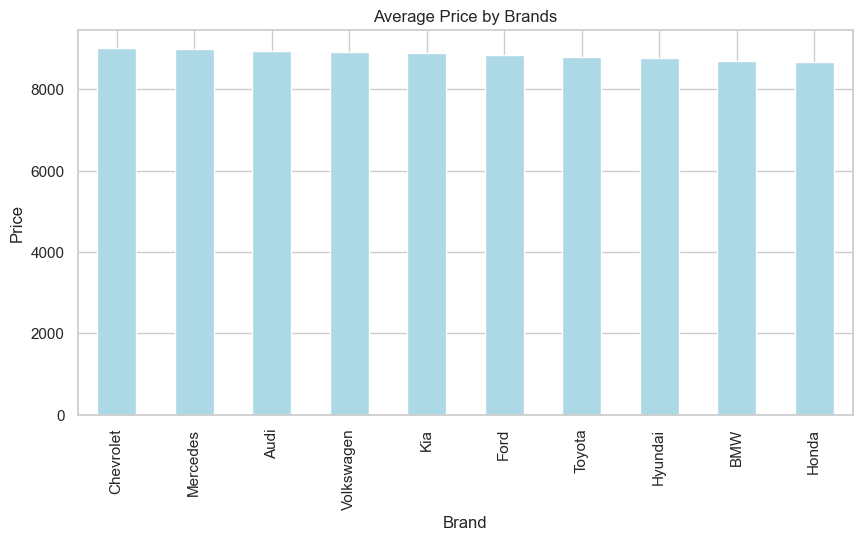

In [14]:
df.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='lightblue')
plt.title("Average Price by Brands")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

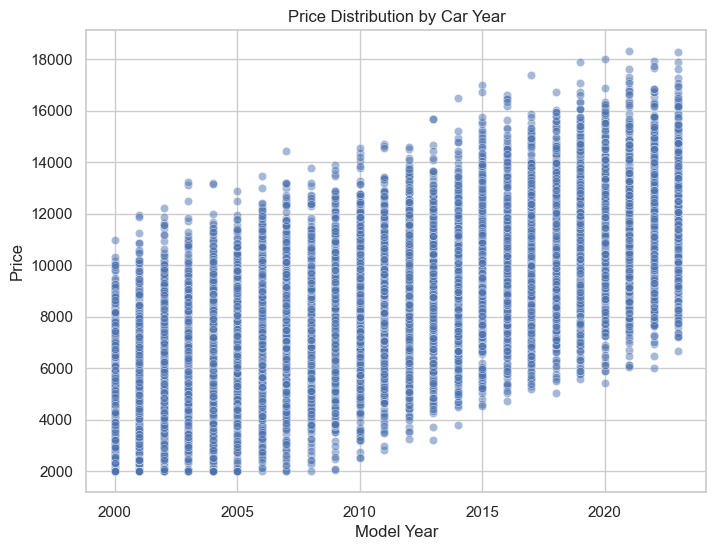

In [15]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Year', y='Price', alpha=0.5)
plt.title("Price Distribution by Car Year")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()

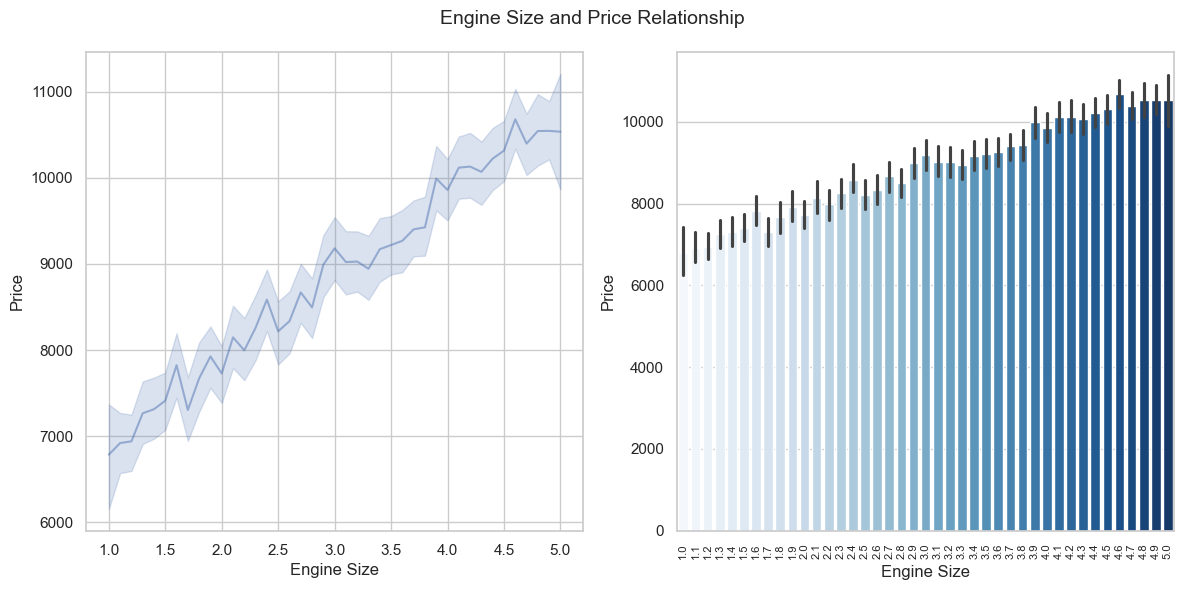

In [16]:
plt.figure(figsize=(12,6))

plt.suptitle("Engine Size and Price Relationship", fontsize=14)

plt.subplot(1,2,1)
sns.lineplot(data=df, x='Engine_Size', y='Price', alpha=0.5)
plt.xlabel("Engine Size")
plt.ylabel("Price")

plt.subplot(1,2,2)
sns.barplot(data=df, x='Engine_Size', y='Price',palette="Blues")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.xticks(rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
fuel_counts = df['Fuel_Type'].value_counts()

fig = go.Figure()

fig.add_trace(go.Pie(
    values=fuel_counts.values,
    labels=fuel_counts.index,
    domain= {"x": [0, .5]},
    hole=0.3, 
    hoverinfo="label+percent+value",
    marker=dict(colors=['#add8e6', '#87ceeb', '#4682b4', '#1e90ff'])
))

fig.update_layout(
    title_text="Vehicle Distribution by Fuel Type",
    annotations=[{
        "font": {"size": 20},
        "showarrow": False,
        "text": " ",  
        "x": 0.20,
        "y": 1
    }],
    legend=dict(
        x=0.6,
        y=0.5,
        font=dict(size=12)
    ),
    margin=dict(l=10, r=10, t=50, b=50)
)

iplot(fig)

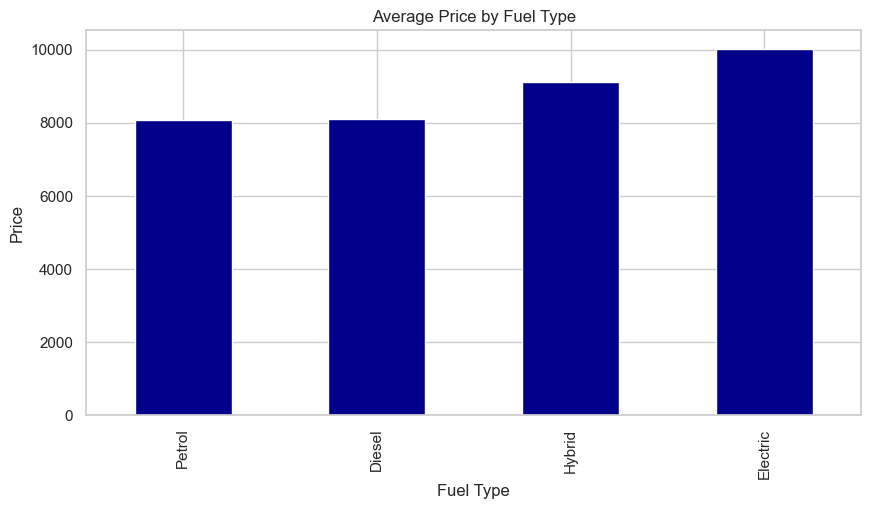

In [18]:
df.groupby('Fuel_Type')['Price'].mean().sort_values().plot(kind='bar', figsize=(10,5), color='darkblue')
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

In [19]:
df.Doors.value_counts()

Doors
3    2575
4    2514
5    2456
2    2455
Name: count, dtype: int64

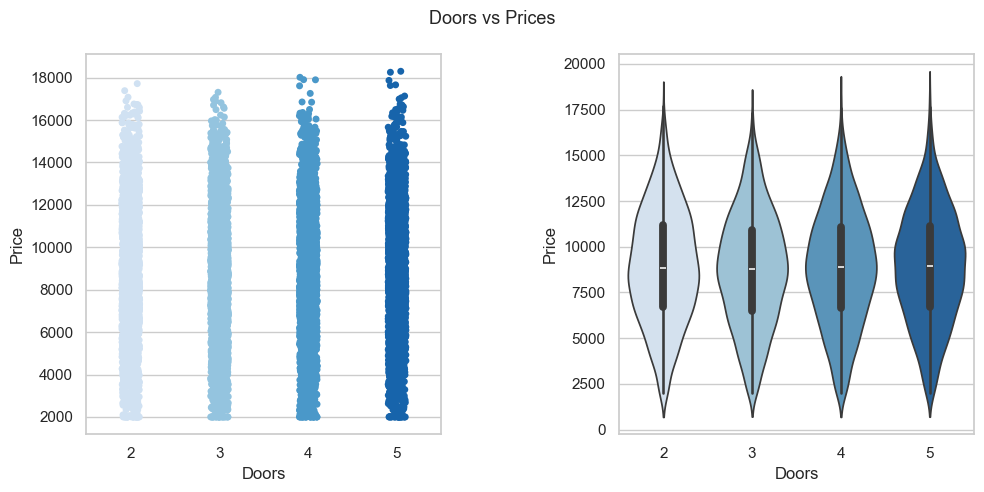

In [20]:
plt.figure(figsize=(10,5))

plt.suptitle("Doors vs Prices",fontsize=13)

plt.subplot(1,2,1)
sns.stripplot(x=df.Doors,y=df.Price,palette="Blues")
plt.xlabel("Doors")
plt.ylabel("Price")

plt.subplot(1,2,2)
sns.violinplot(x=df.Doors,y=df.Price,palette="Blues")
plt.xlabel("Doors")
plt.ylabel("Price")

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

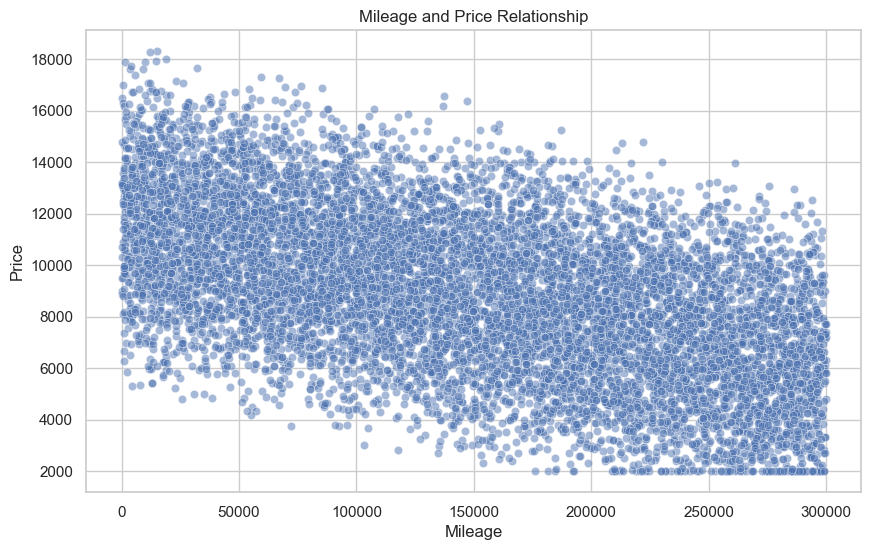

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Mileage', y='Price', alpha=0.5)
plt.title("Mileage and Price Relationship")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

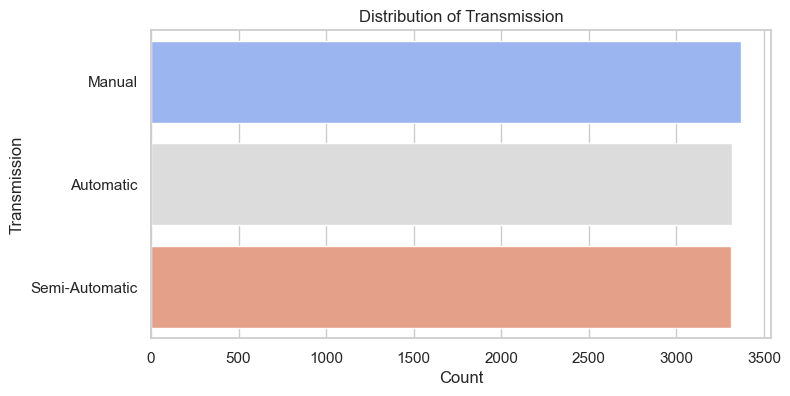

In [22]:
plt.figure(figsize=(8,4))

sns.countplot(y=df.Transmission,palette="coolwarm")
plt.title("Distribution of Transmission")
plt.xlabel("Count")
plt.ylabel("Transmission")

plt.show()

In [23]:
new_pivot = df.pivot_table(
    index="Transmission",              
    values="Price",     
    aggfunc="mean"                    
)
new_pivot

,Price
Transmission,
Automatic,9938.252939
Manual,8363.426157
Semi-Automatic,8264.266385


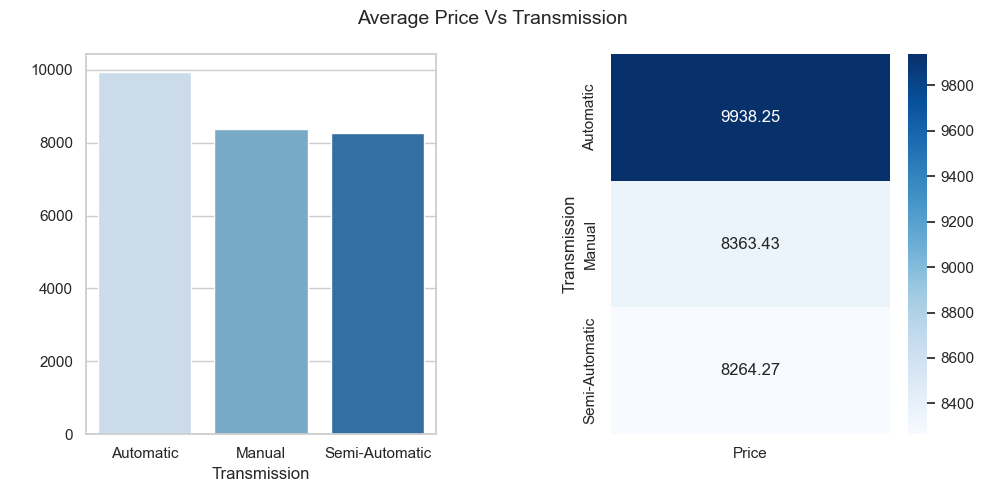

In [24]:
fig, axes=plt.subplots(1,2,figsize=(10,5))

plt.suptitle("Average Price Vs Transmission", fontsize=14)

sns.barplot(x=new_pivot.index,y=new_pivot.Price,ax=axes[0],palette="Blues")
axes[0].set_xlabel('Transmission')
axes[0].set_ylabel(' ')

sns.heatmap(new_pivot, annot=True, cmap='Blues', cbar=True, fmt='.2f',ax=axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Transmission')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

In [25]:
df.Owner_Count.value_counts()

Owner_Count
5    2036
1    2036
2    2020
3    1977
4    1931
Name: count, dtype: int64

In [27]:
sns.set_theme(style="whitegrid")
fig = px.scatter(df, x="Owner_Count", y="Price", trendline="ols", title="Owner Count vs Price")
fig.show()

In [28]:
brand_model_price = df.groupby(["Brand", "Model"])[["Price"]].agg(["mean", "min", "max", "count"]).reset_index()

brand_model_price.columns = ["Brand", "Model", "Avg_Price", "Min_Price", "Max_Price", "Count"]

print(brand_model_price)

         Brand     Model    Avg_Price  Min_Price  Max_Price  Count
0         Audi        A3  8912.316568       2000      18255    338
1         Audi        A4  8919.962857       2374      16619    350
2         Audi        Q5  8955.257143       2000      16734    350
3          BMW  3 Series  8854.752239       2000      17134    335
4          BMW  5 Series  8669.218130       2000      17386    353
5          BMW        X5  8581.311897       2000      16544    311
6    Chevrolet   Equinox  9156.320635       2000      17054    315
7    Chevrolet    Impala  9001.115493       2000      17072    355
8    Chevrolet    Malibu  8898.180180       2000      17661    333
9         Ford  Explorer  8804.895210       2000      18017    334
10        Ford    Fiesta  8971.077135       2000      16705    363
11        Ford     Focus  8775.378917       2000      16969    351
12       Honda    Accord  8743.761644       2000      17906    365
13       Honda      CR-V  8734.714286       2000      17899   

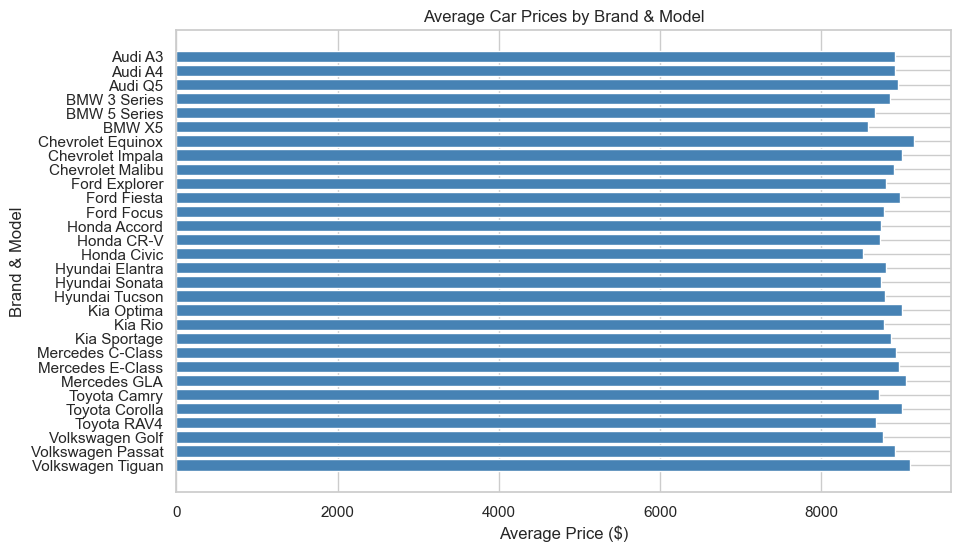

In [29]:
new_data = df.groupby(["Brand", "Model"])["Price"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.barh(new_data.apply(lambda x: f"{x['Brand']} {x['Model']}", axis=1), new_data["Price"], color="steelblue")

plt.xlabel("Average Price ($)")
plt.ylabel("Brand & Model")
plt.title("Average Car Prices by Brand & Model")
plt.gca().invert_yaxis() 
plt.show()